## Exploration Data

In [7]:
import pandas as pd
import numpy as np
from IPython.display import display

In [8]:
import pandas as pd
df = pd.read_csv('../Tasking/Github/vdjdb-2023-06-01/vdjdb.txt', sep="\t")
df.sample(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
29181,4110,TRB,CASTLITGELFF,TRBV28*01,TRBJ2-2*01,HomoSapiens,HLA-A*03:01,B2M,MHCI,KLGGALQAK,...,CMV,https://www.10xgenomics.com/resources/applicat...,"{""frequency"": ""1/11684"", ""identification"": ""de...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CASTLITGELFF"", ""cdr3_old"": ""CASTLITG...",0,sort,singlecell,no,no
33586,6313,TRA,CAASSFSGTYKYIF,TRAV23/DV6*01,TRAJ40*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,ELAGIGILTV,...,HomoSapiens,https://www.10xgenomics.com/resources/applicat...,"{""frequency"": ""1/11684"", ""identification"": ""de...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CAASSFSGTYKYIF"", ""cdr3_old"": ""CAASSF...",0,sort,singlecell,no,no
80722,0,TRB,CASSGPGGEQYF,TRBV28*01,TRBJ2-7*01,HomoSapiens,HLA-B*57:01,B2M,MHCI,KAFSPEVIPMF,...,HIV-1,PMID:18802118,"{""frequency"": ""1/88"", ""identification"": ""beads...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSGPGGEQYF"", ""cdr3_old"": ""CASSGPGG...",0,sort,sanger,no,no
14069,0,TRA,CAVQANAGKSTF,TRAV20*01,TRAJ27*01,HomoSapiens,HLA-A*02,B2M,MHCI,GILGFVFTL,...,InfluenzaA,PMID:28423320,"{""frequency"": ""0.0052%"", ""identification"": ""an...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVQANAGKSTF"", ""cdr3_old"": ""CAVQANAG...",0,sort,amplicon,no,no
20343,0,TRB,CASSPGTGVEQYF,TRBV13-1*01,TRBJ2-1*01,MusMusculus,H-2Kb,B2M,MHCI,KGYVYQGL,...,VSV,PMID:9560256,"{""frequency"": ""2/12"", ""identification"": ""antig...","{""cell.subset"": ""CD8+,Va2+"", ""clone.id"": """", ""...","{""cdr3"": ""CASSPGTGVEQYF"", ""cdr3_old"": ""CASSPGT...",2,culture,sanger,no,yes


In [9]:
df.shape


(92771, 21)

# Exploring antigen.epitope

In [10]:
# Total number of classes
df["antigen.epitope"].nunique()

1169

In [11]:
# Frequency of rows for each epitope
freq_count = df["antigen.epitope"].value_counts()
# freq_count[freq_count<10000]
freq_count.reset_index().rename({
    "antigen.epitope": "number_of_datapoints",
    "index": "antigen.epitope"
},axis = 1)

,antigen.epitope,number_of_datapoints
0,KLGGALQAK,27948
1,GILGFVFTL,10024
2,NLVPMVATV,8004
3,AVFDRKSDAK,3546
4,RAKFKQLL,2756
...,...,...
1164,SSSKLWAQY,1
1165,TLVPQEHYV,1
1166,SFLPGVYSV,1
1167,RYLALYNKY,1


In [12]:
## Epitopes having less or more than N number of datapoints

def print_num_epitopes(N):
    
    print(f"""Epitopes having less than {N} datapoints:  {freq_count[freq_count<N].shape[0]}""")
    
    print(f"""Epitopes having more than {N} datapoints:  {df["antigen.epitope"].nunique() - freq_count[freq_count<N].shape[0]}""")
    
    
print_num_epitopes(500)

Epitopes having less than 500 datapoints:  1142
Epitopes having more than 500 datapoints:  27


In [13]:
## Majority of epitopes have less than 10 datapoints.

In [14]:
print_num_epitopes(100)

Epitopes having less than 100 datapoints:  1094
Epitopes having more than 100 datapoints:  75


# Exploring antigen.species

In [15]:
# Top 10 antigen species in terms of number of records
num_datapoints_each_species = df.groupby("antigen.species")["antigen.epitope"].count().sort_values(ascending = False)
num_datapoints_each_species.head(10)

antigen.species
CMV            38345
InfluenzaA     15182
EBV            11440
SARS-CoV-2     10133
HomoSapiens     5095
HIV-1           3554
HCV             2359
SIV             2119
MCMV            1463
YFV              789
Name: antigen.epitope, dtype: int64

In [16]:
top_10_antigen_species = num_datapoints_each_species[:10].index.to_list()
top_10_antigen_species

['CMV',
 'InfluenzaA',
 'EBV',
 'SARS-CoV-2',
 'HomoSapiens',
 'HIV-1',
 'HCV',
 'SIV',
 'MCMV',
 'YFV']

# Filtering the data  

Filter the data based on the top 10 epitopes in terms of data points.
Filter data based on the vdj score.

In [17]:
## filtering the data based on top 10 epitopes in terms of data points

freq_count = df["antigen.epitope"].value_counts()
display(freq_count[:10])
top_10_epitopes = freq_count[:10].index.to_list()
print(f"Top 10 epitopes in terms of data points: \n{top_10_epitopes}")

KLGGALQAK     27948
GILGFVFTL     10024
NLVPMVATV      8004
AVFDRKSDAK     3546
RAKFKQLL       2756
ELAGIGILTV     2687
YLQPRTFLL      2008
GLCTLVAML      1879
IVTDFSVIK      1486
SSYRRPVGI      1322
Name: antigen.epitope, dtype: int64

Top 10 epitopes in terms of data points: 
['KLGGALQAK', 'GILGFVFTL', 'NLVPMVATV', 'AVFDRKSDAK', 'RAKFKQLL', 'ELAGIGILTV', 'YLQPRTFLL', 'GLCTLVAML', 'IVTDFSVIK', 'SSYRRPVGI']


In [18]:
df_top_10_epitopes = df[
    (df["antigen.epitope"] == "KLGGALQAK") |
    (df["antigen.epitope"] == "GILGFVFTL") |
    (df["antigen.epitope"] == "NLVPMVATV") |
    (df["antigen.epitope"] == "AVFDRKSDAK") |
    (df["antigen.epitope"] == "RAKFKQLL") |
    (df["antigen.epitope"] == "ELAGIGILTV") |
    (df["antigen.epitope"] == "YLQPRTFLL") |
    (df["antigen.epitope"] == "GLCTLVAML") |
    (df["antigen.epitope"] == "IVTDFSVIK") |
    (df["antigen.epitope"] == "SSYRRPVGI") 
]
df_top_10_epitopes.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
398,0,TRB,CASSPQTGTGGYGYTF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,CMV,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPQTGTGGYGYTF"", ""cdr3_old"": ""CASS...",0,other,sanger,no,yes
399,0,TRB,CASSPQTGTGGYGYTF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,CMV,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPQTGTGGYGYTF"", ""cdr3_old"": ""CASS...",0,other,sanger,no,yes
400,0,TRB,CASSPLFGTSGGETYYF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,CMV,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPLFGTSGGETYYF"", ""cdr3_old"": ""CAS...",0,other,sanger,no,yes
401,0,TRB,CASSPQTGTGGYGYTF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,CMV,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPQTGTGGYGYTF"", ""cdr3_old"": ""CASS...",0,other,sanger,no,yes
402,0,TRB,CASSPQTGASYGYTF,TRBV6-5*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,CMV,PMID:12165524,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSPQTGASYGYTF"", ""cdr3_old"": ""CASSP...",0,other,sanger,no,yes


In [19]:
df_top_10_epitopes.shape

(61660, 21)

In [20]:
df_top_10_epitopes["vdjdb.score"].value_counts()

0    57964
1     2152
3      907
2      637
Name: vdjdb.score, dtype: int64

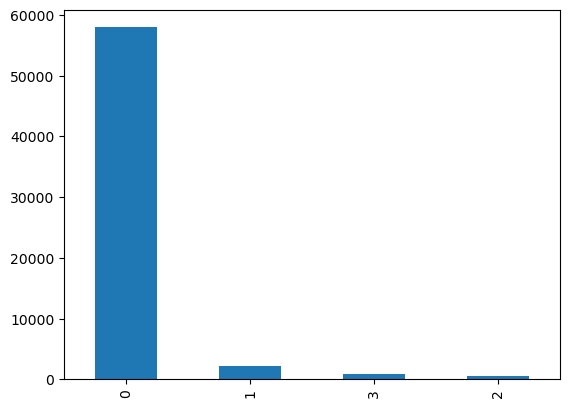

In [21]:
df_top_10_epitopes["vdjdb.score"].value_counts().plot(kind = "bar");

# score_greater_than_0

In [22]:
df_score_greater_than_0 = df_top_10_epitopes[df_top_10_epitopes["vdjdb.score"]>0]
df_score_greater_than_0.shape

(3696, 21)

In [23]:
df_score_greater_than_0["antigen.epitope"].value_counts()

NLVPMVATV     1278
GILGFVFTL      739
SSYRRPVGI      522
GLCTLVAML      447
YLQPRTFLL      244
RAKFKQLL       243
ELAGIGILTV     176
IVTDFSVIK       30
AVFDRKSDAK      15
KLGGALQAK        2
Name: antigen.epitope, dtype: int64

In [24]:
df[df["vdjdb.score"]>0]["antigen.epitope"].value_counts()[:10]

NLVPMVATV               1278
GILGFVFTL                739
SSYRRPVGI                522
GLCTLVAML                447
NEGVKAAW                 425
TTPESANL                 303
FRDYVDRFYKTLRAEQASQE     292
SSPPMFRV                 291
CTPYDINQM                273
ASNENMETM                272
Name: antigen.epitope, dtype: int64

- Removing datapoints that have a vdjb.score = 0, results in a significant reduction of datapoints. Lack of datapoints could impact the performance of the classifier. 